In [1]:
import os 
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt 

### **GET DATA**

In [2]:
ROOT ='data'
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))

In [3]:
def read_image_from_path(path, size):
    im = Image.open(path).convert('RGB').resize(size)
    return np.array(im)

def folder_to_images(folder, size):
    list_dir = [folder + '/' + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

### **Plot results**

In [4]:
def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(15, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448,448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=reverse)[:5], 2):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448,448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

### **Absolute Difference**

In [5]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

### **Get L1 Score**

In [6]:
def get_l1_score(root_image_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_image_path):
        if folder in CLASS_NAME:
            path = root_image_path + folder 
            images_np, images_path = folder_to_images(path, size)
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

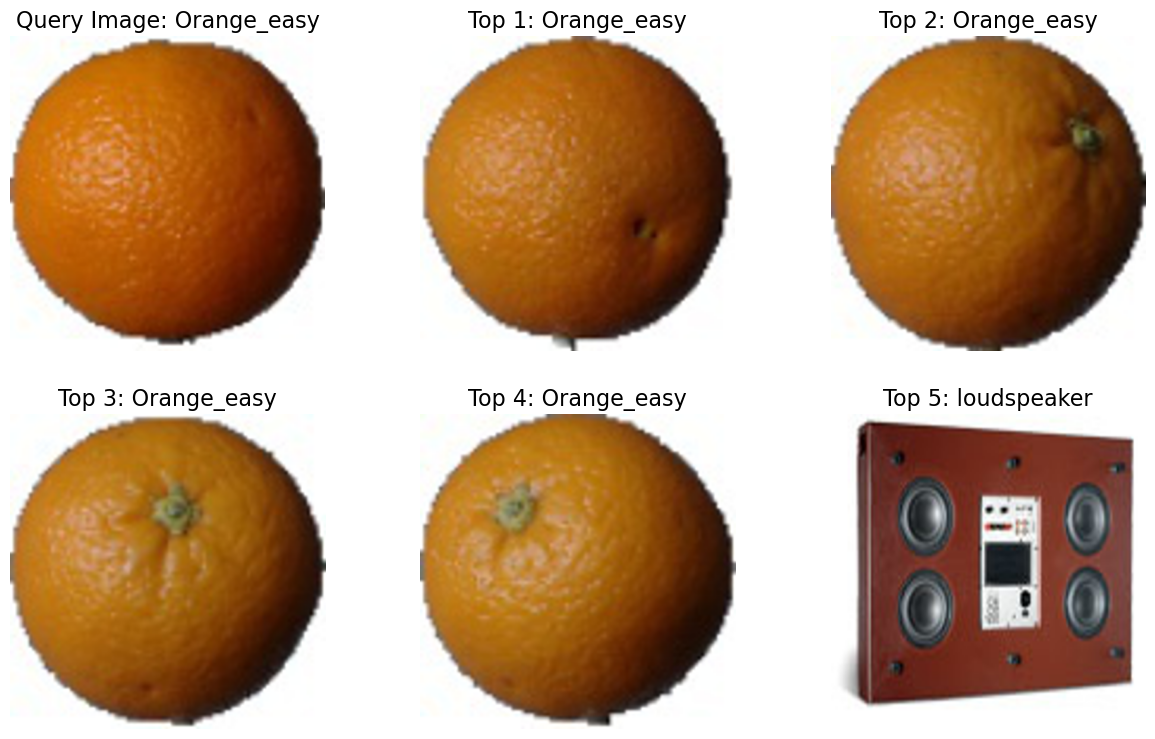

In [7]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [40]:
ls_path_score

[('data/train/African_crocodile/n01697457_10393.JPEG', 61358633.0),
 ('data/train/African_crocodile/n01697457_104.JPEG', 48248024.0),
 ('data/train/African_crocodile/n01697457_1331.JPEG', 52395683.0),
 ('data/train/African_crocodile/n01697457_14906.JPEG', 53721578.0),
 ('data/train/African_crocodile/n01697457_18587.JPEG', 49970490.0),
 ('data/train/African_crocodile/n01697457_260.JPEG', 46559823.0),
 ('data/train/African_crocodile/n01697457_5586.JPEG', 53989546.0),
 ('data/train/African_crocodile/n01697457_8136.JPEG', 51450166.0),
 ('data/train/African_crocodile/n01697457_8331.JPEG', 59068854.0),
 ('data/train/African_crocodile/n01697457_85.JPEG', 53013754.0),
 ('data/train/ambulance/n02701002_11033.JPEG', 60946267.0),
 ('data/train/ambulance/n02701002_1264.JPEG', 60273542.0),
 ('data/train/ambulance/n02701002_15786.JPEG', 53215816.0),
 ('data/train/ambulance/n02701002_17491.JPEG', 60852933.0),
 ('data/train/ambulance/n02701002_18950.JPEG', 53976400.0),
 ('data/train/ambulance/n0270100

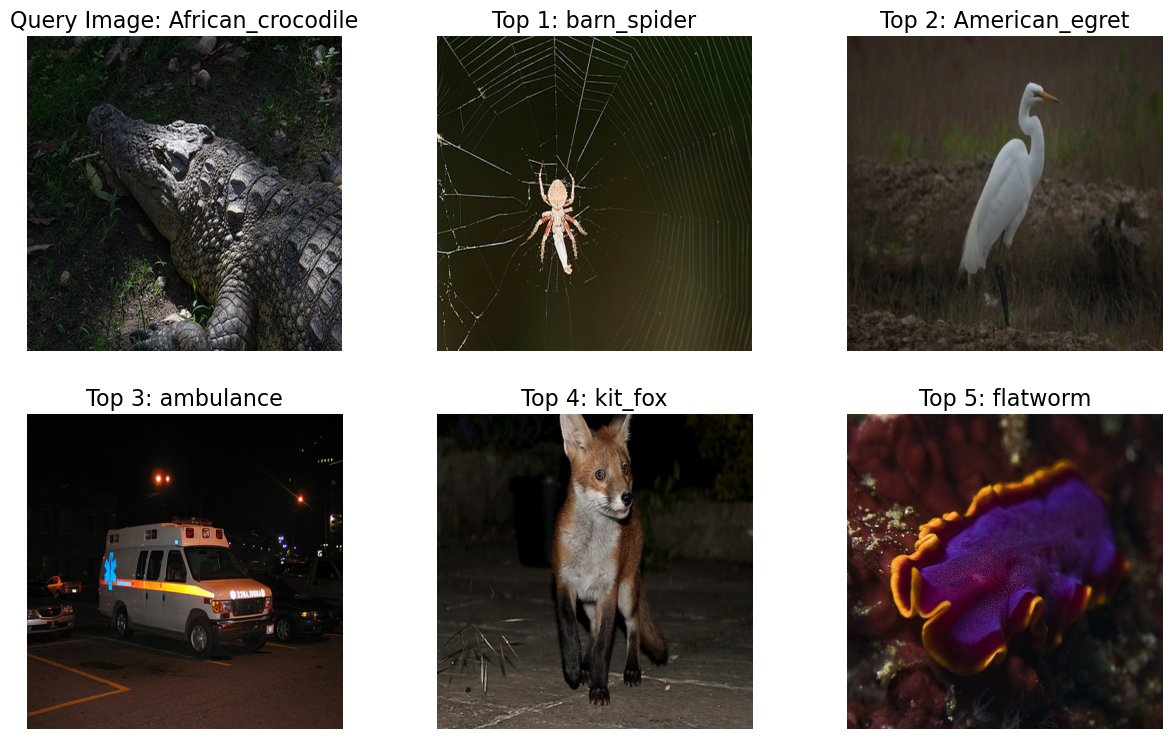

In [8]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

### **Mean Square Difference**

In [9]:
def mean_square_difference(query, data):
    axis_path_size = tuple(range(1, len(data.shape)))
    return np.mean((data-query)**2, axis=axis_path_size)

In [10]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

### **Query Image Orange**

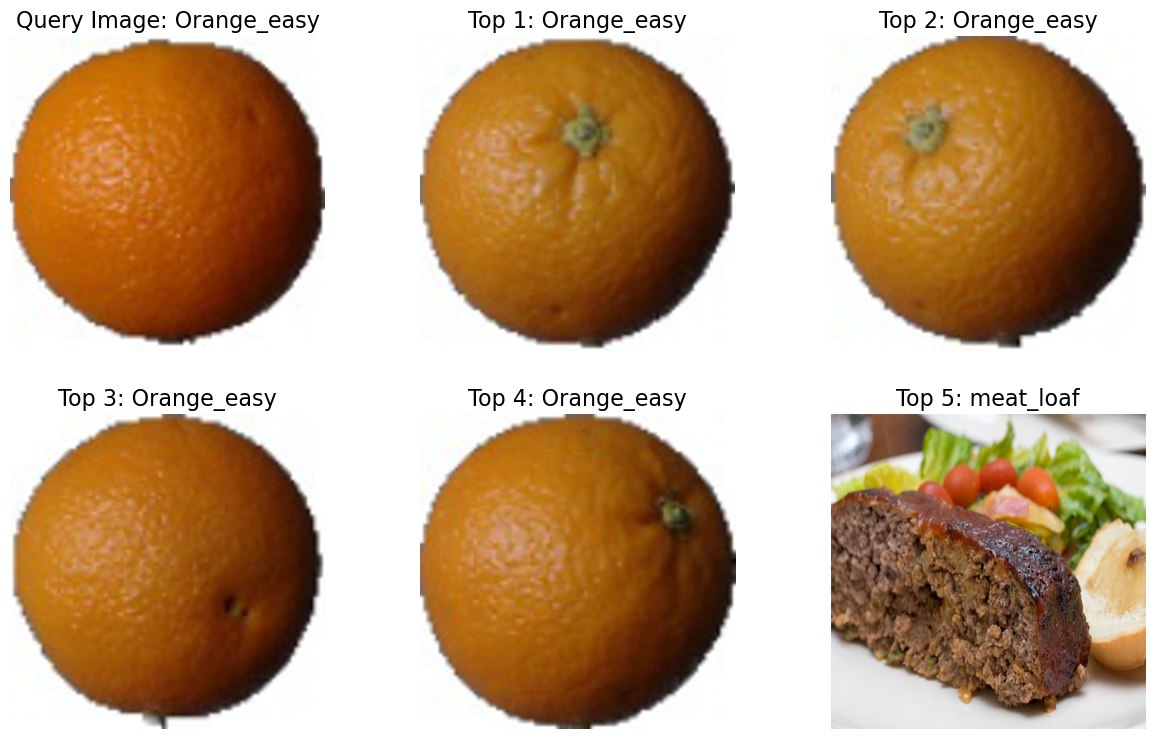

In [11]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

### **Query African Crocodile**

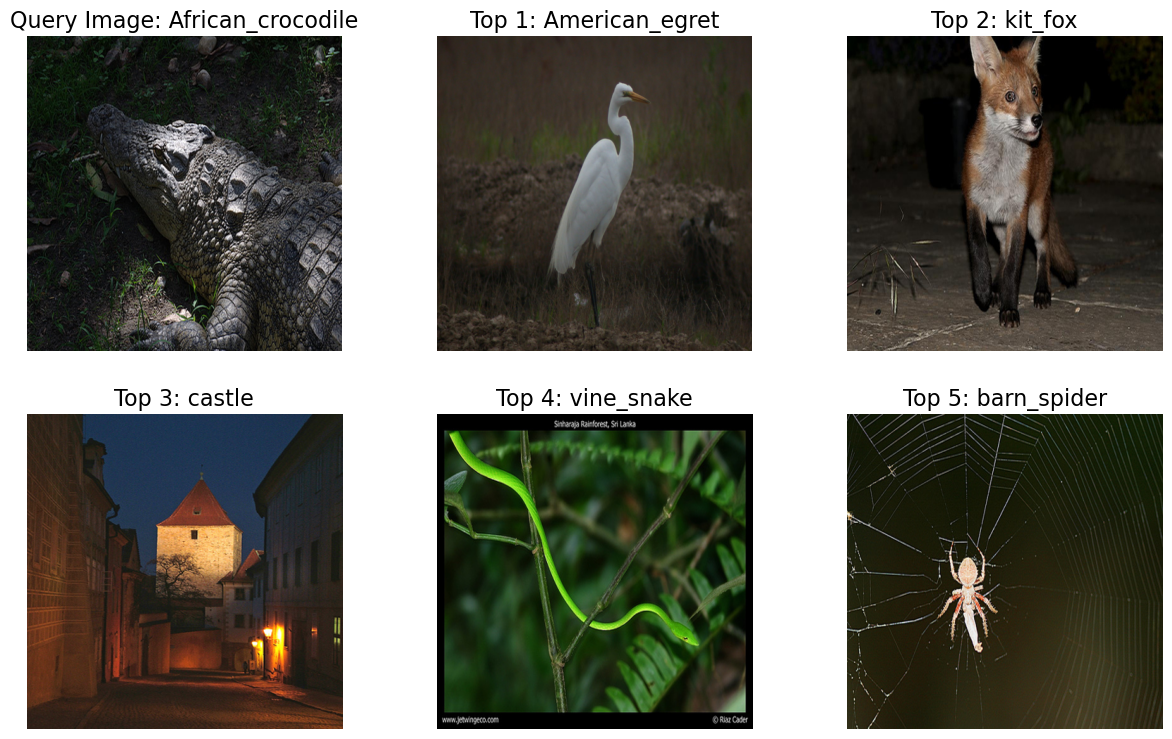

In [12]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (480, 480)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [15]:
ls_path_score

[('data/train/African_crocodile/n01697457_10393.JPEG', 15894.736015625),
 ('data/train/African_crocodile/n01697457_104.JPEG', 6768.849217303241),
 ('data/train/African_crocodile/n01697457_1331.JPEG', 8383.375049189815),
 ('data/train/African_crocodile/n01697457_14906.JPEG', 3846.720280671296),
 ('data/train/African_crocodile/n01697457_18587.JPEG', 6748.367581018519),
 ('data/train/African_crocodile/n01697457_260.JPEG', 12438.251244212963),
 ('data/train/African_crocodile/n01697457_5586.JPEG', 4852.6039728009255),
 ('data/train/African_crocodile/n01697457_8136.JPEG', 5682.8505685763885),
 ('data/train/African_crocodile/n01697457_8331.JPEG', 10582.599554398148),
 ('data/train/African_crocodile/n01697457_85.JPEG', 5236.44525462963),
 ('data/train/ambulance/n02701002_11033.JPEG', 9644.385127314816),
 ('data/train/ambulance/n02701002_1264.JPEG', 12357.20400462963),
 ('data/train/ambulance/n02701002_15786.JPEG', 20251.23368778935),
 ('data/train/ambulance/n02701002_17491.JPEG', 11044.8600260

### **Cosine Similarity**

In [13]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (query_norm * data_norm + np.finfo(float).eps)

In [14]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder 
            images_np, images_path = folder_to_images(path, size)
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

### **Query Image Orange**

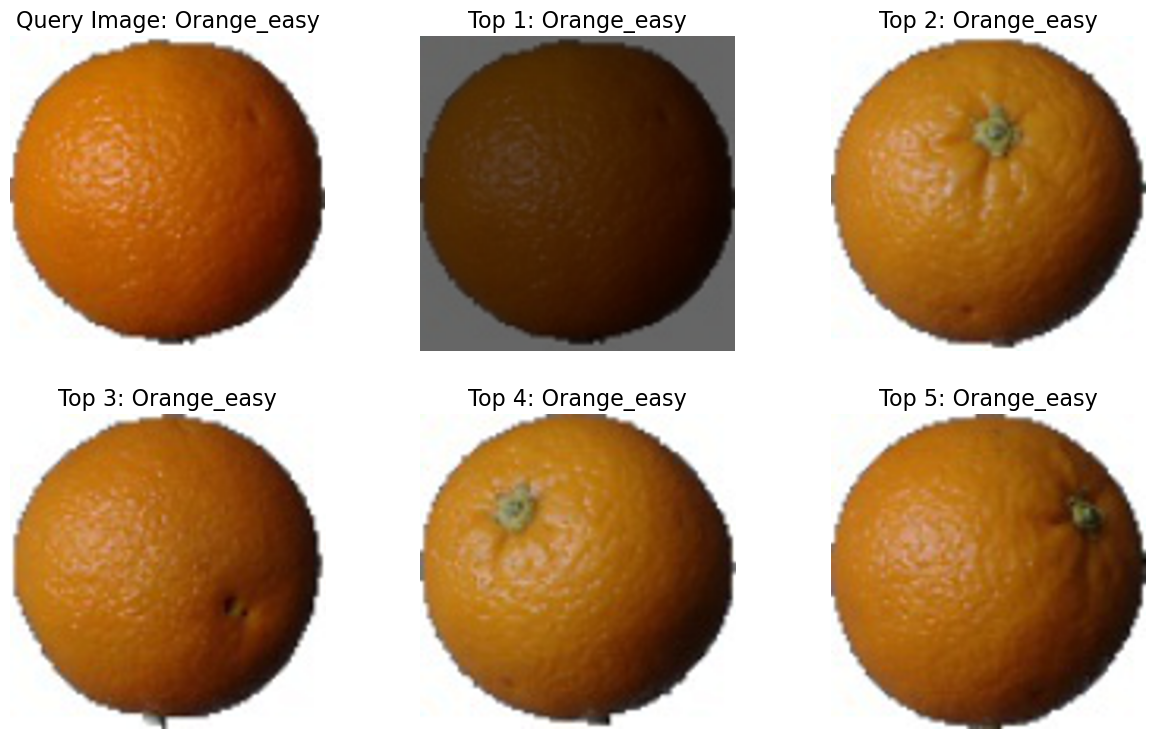

In [15]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (480, 480)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size) 
plot_results(query_path, ls_path_score, reverse=True)

### **Query African Crocodile**

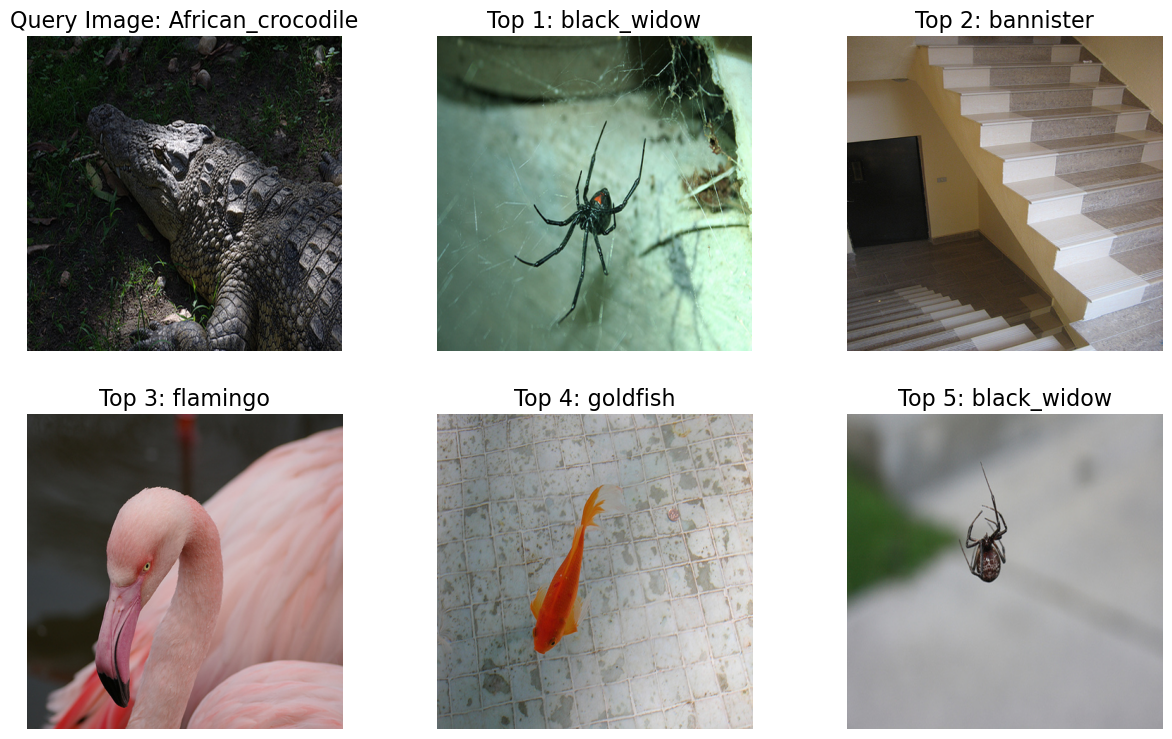

In [16]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [21]:
ls_path_score

[('data/train/African_crocodile/n01697457_10393.JPEG', 3.847231688156522),
 ('data/train/African_crocodile/n01697457_104.JPEG', 3.5601348718610306),
 ('data/train/African_crocodile/n01697457_1331.JPEG', 3.9860097451861387),
 ('data/train/African_crocodile/n01697457_14906.JPEG', 3.808687261995355),
 ('data/train/African_crocodile/n01697457_18587.JPEG', 3.4365677236258527),
 ('data/train/African_crocodile/n01697457_260.JPEG', 3.593177620528298),
 ('data/train/African_crocodile/n01697457_5586.JPEG', 3.3678955683756477),
 ('data/train/African_crocodile/n01697457_8136.JPEG', 3.240405828198146),
 ('data/train/African_crocodile/n01697457_8331.JPEG', 3.8811305302060064),
 ('data/train/African_crocodile/n01697457_85.JPEG', 3.7317527651834324),
 ('data/train/ambulance/n02701002_11033.JPEG', 3.3658914264715576),
 ('data/train/ambulance/n02701002_1264.JPEG', 2.475099115948826),
 ('data/train/ambulance/n02701002_15786.JPEG', 2.8245050016613846),
 ('data/train/ambulance/n02701002_17491.JPEG', 3.2050

### **Correlation Coefficient**

In [17]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1,len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))
    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (query_norm*data_norm + np.finfo(float).eps)

In [18]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(path, size) # mang numpy nhieu anh, paths
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

### **Query Orange Image**

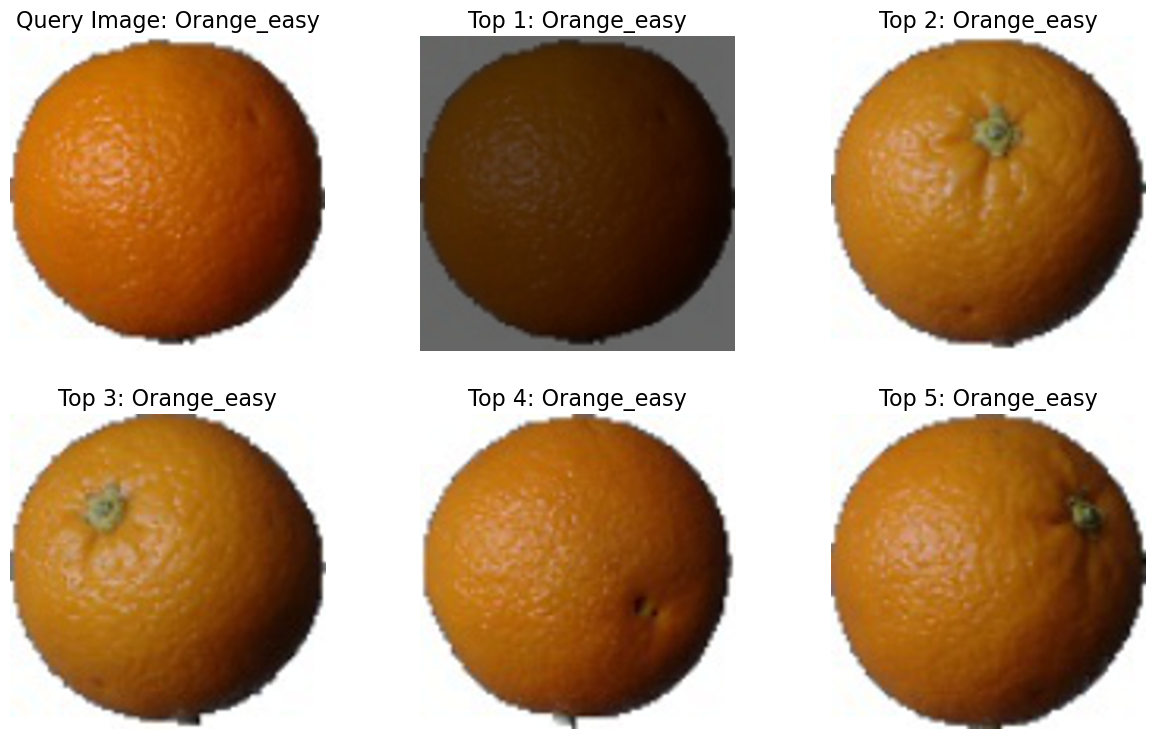

In [19]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

### **Query African Crocodile**

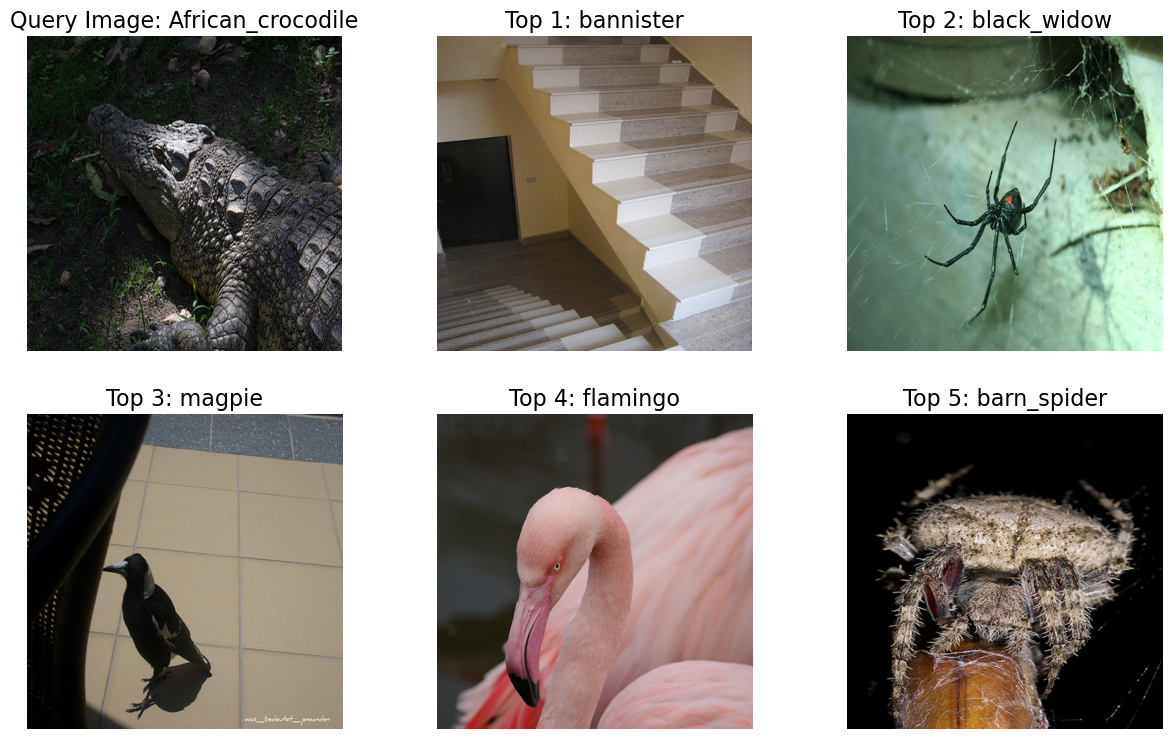

In [20]:
root_img_path =f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)